### Prediction using unsupervised machine learning

###    V.Abhinaya

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('task2_iris.csv')
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
ds.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
ds.drop(['Id'],axis=1,inplace=True)
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
import seaborn as sns

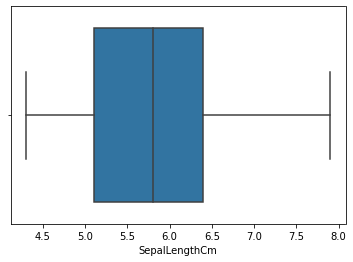

In [7]:
sns.boxplot(x=ds['SepalLengthCm'])

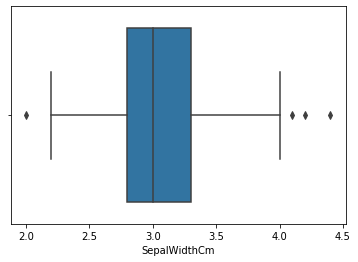

In [8]:
sns.boxplot(x=ds['SepalWidthCm'])

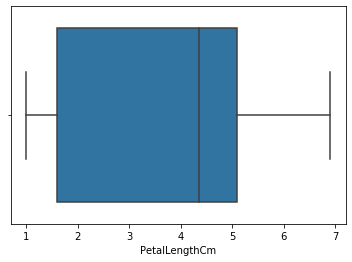

In [9]:
sns.boxplot(x=ds['PetalLengthCm'])

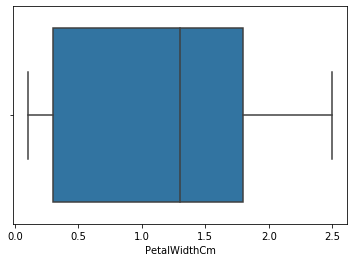

In [10]:
sns.boxplot(x=ds['PetalWidthCm'])

In [11]:
q1=ds.quantile(0.25)
q3=ds.quantile(0.75)
iqr=q3-q1
iqr

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64

In [12]:
df=ds[~((ds<(q1-1.5*iqr))|(ds>(q3+1.5*iqr))).any(axis=1)]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
x=df.iloc[:,0:4].values

In [14]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

In [15]:
from sklearn.cluster import KMeans

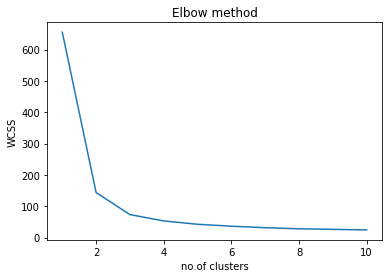

In [16]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)#in the package,wcss is calculated by the attribute inertia
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
ymeans=kmeans.fit_predict(x)
ymeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [18]:
x.shape

(146, 4)

In [19]:
ymeans.shape

(146,)

In [20]:
kmeans.cluster_centers_

array([[4.97659574, 3.36595745, 1.46382979, 0.24468085],
       [5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

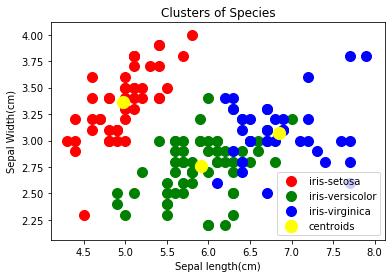

In [21]:
#visualising the clusters on first 2 columns i.e sepal-length and sepal-width
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,color='red',label='iris-setosa')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,color='green',label='iris-versicolor')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,color='blue',label='iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,color='yellow',label='centroids')
plt.title('Clusters of Species')
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.legend()

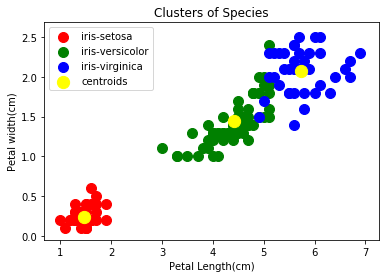

In [22]:
#visualising clusters between petal-length and petal-width
plt.scatter(x[ymeans==0,2],x[ymeans==0,3],s=100,color='red',label='iris-setosa')
plt.scatter(x[ymeans==1,2],x[ymeans==1,3],s=100,color='green',label='iris-versicolor')
plt.scatter(x[ymeans==2,2],x[ymeans==2,3],s=100,color='blue',label='iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=150,color='yellow',label='centroids')
plt.title('Clusters of Species')
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()
plt.show()